In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Math/dataset_new

/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new


**Dataset Prep**

In [ ]:
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new/train'
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2467 files belonging to 4 classes.
Using 1974 files for training.


In [ ]:
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new/test'
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode='categorical',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 433 files belonging to 4 classes.
Using 86 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Closed', 'Open', 'no_yawn', 'yawn']


# Resnet

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

In [ ]:
resnet_model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 512)               1049088   
                                                                 
 dense_9 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
62/62 [==============================] - 307s 5s/step - loss: 0.5646 - accuracy: 0.8288 - val_loss: 0.2408 - val_accuracy: 0.8953
Epoch 2/10
62/62 [==============================] - 220s 4s/step - loss: 0.1394 - accuracy: 0.9402 - val_loss: 0.2373 - val_accuracy: 0.9070
Epoch 3/10
62/62 [==============================] - 220s 4s/step - loss: 0.1189 - accuracy: 0.9519 - val_loss: 0.1468 - val_accuracy: 0.9419
Epoch 4/10
62/62 [==============================] - 220s 4s/step - loss: 0.0644 - accuracy: 0.9742 - val_loss: 0.1864 - val_accuracy: 0.9419
Epoch 5/10
62/62 [==============================] - 220s 4s/step - loss: 0.0675 - accuracy: 0.9737 - val_loss: 0.1479 - val_accuracy: 0.9419
Epoch 6/10
62/62 [==============================] - 220s 4s/step - loss: 0.0549 - accuracy: 0.9807 - val_loss: 0.1560 - val_accuracy: 0.9535
Epoch 7/10
62/62 [==============================] - 220s 4s/step - loss: 0.1036 - accuracy: 0.9564 - val_loss: 0.1785 - val_accuracy: 0.9535
Epoch 8/10
62

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

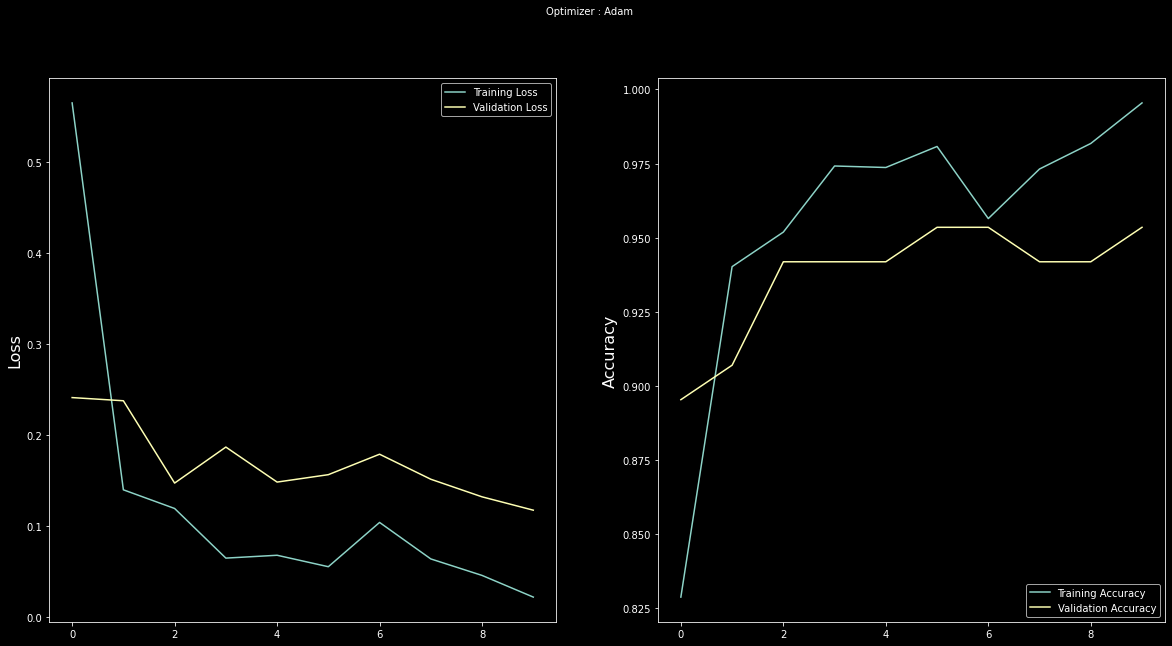

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
resnet_model.save('/home/Resnet.h5')

# Xception

In [ ]:
xception_model = Sequential()
pretrained_model= tf.keras.applications.Xception(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512, activation='relu'))
xception_model.add(Dense(4, activation='softmax'))

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
xception_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_5 (Flatten)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dense_11 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 21,912,620
Trainable params: 1,051,140
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
model_path="/home/Xception.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [ ]:
xception_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=5
history = xception_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = callbacks_list
)

Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 5.4521 - accuracy: 0.6494
Epoch 1: val_accuracy improved from -inf to 0.77907, saving model to /home/Xception.h5
62/62 [==============================] - 239s 4s/step - loss: 5.4521 - accuracy: 0.6494 - val_loss: 1.6942 - val_accuracy: 0.7791
Epoch 2/5
62/62 [==============================] - ETA: 0s - loss: 0.9501 - accuracy: 0.7730
Epoch 2: val_accuracy did not improve from 0.77907
62/62 [==============================] - 226s 4s/step - loss: 0.9501 - accuracy: 0.7730 - val_loss: 2.2121 - val_accuracy: 0.7093
Epoch 3/5
62/62 [==============================] - ETA: 0s - loss: 1.1287 - accuracy: 0.7913
Epoch 3: val_accuracy improved from 0.77907 to 0.79070, saving model to /home/Xception.h5
62/62 [==============================] - 227s 4s/step - loss: 1.1287 - accuracy: 0.7913 - val_loss: 0.9378 - val_accuracy: 0.7907
Epoch 4/5
62/62 [==============================] - ETA: 0s - loss: 0.5935 - accuracy: 0.8146
Epoch 4: v

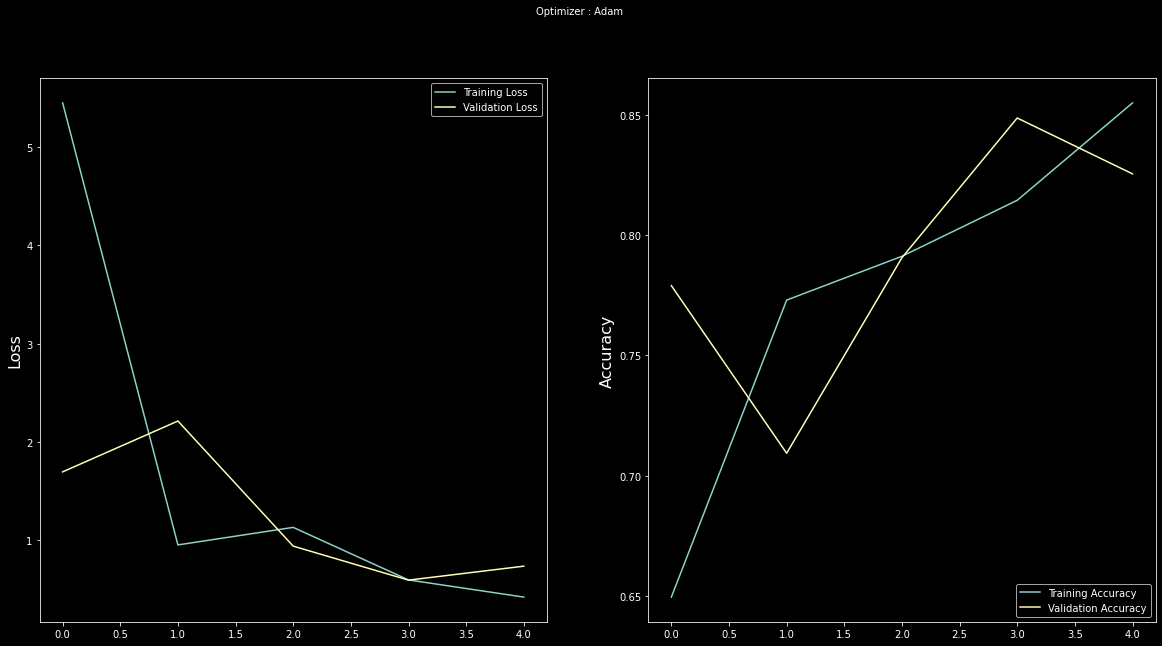

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# InceptionV3

In [ ]:
inception_model = Sequential()
pretrained_model= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

inception_model.add(pretrained_model)
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(4, activation='softmax'))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_6 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dense_13 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model_path="/home/Inception.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [ ]:
inception_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=5
history = inception_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = callbacks_list
)

Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 24.2292 - accuracy: 0.6165
Epoch 1: val_accuracy improved from -inf to 0.67442, saving model to /home/Inception.h5
62/62 [==============================] - 145s 2s/step - loss: 24.2292 - accuracy: 0.6165 - val_loss: 3.8258 - val_accuracy: 0.6744
Epoch 2/5
62/62 [==============================] - ETA: 0s - loss: 1.4701 - accuracy: 0.7462
Epoch 2: val_accuracy improved from 0.67442 to 0.68605, saving model to /home/Inception.h5
62/62 [==============================] - 137s 2s/step - loss: 1.4701 - accuracy: 0.7462 - val_loss: 1.7985 - val_accuracy: 0.6860
Epoch 3/5
62/62 [==============================] - ETA: 0s - loss: 1.1125 - accuracy: 0.7700
Epoch 3: val_accuracy did not improve from 0.68605
62/62 [==============================] - 136s 2s/step - loss: 1.1125 - accuracy: 0.7700 - val_loss: 2.0967 - val_accuracy: 0.6744
Epoch 4/5
62/62 [==============================] - ETA: 0s - loss: 0.9582 - accuracy: 0.7918
Epoch 

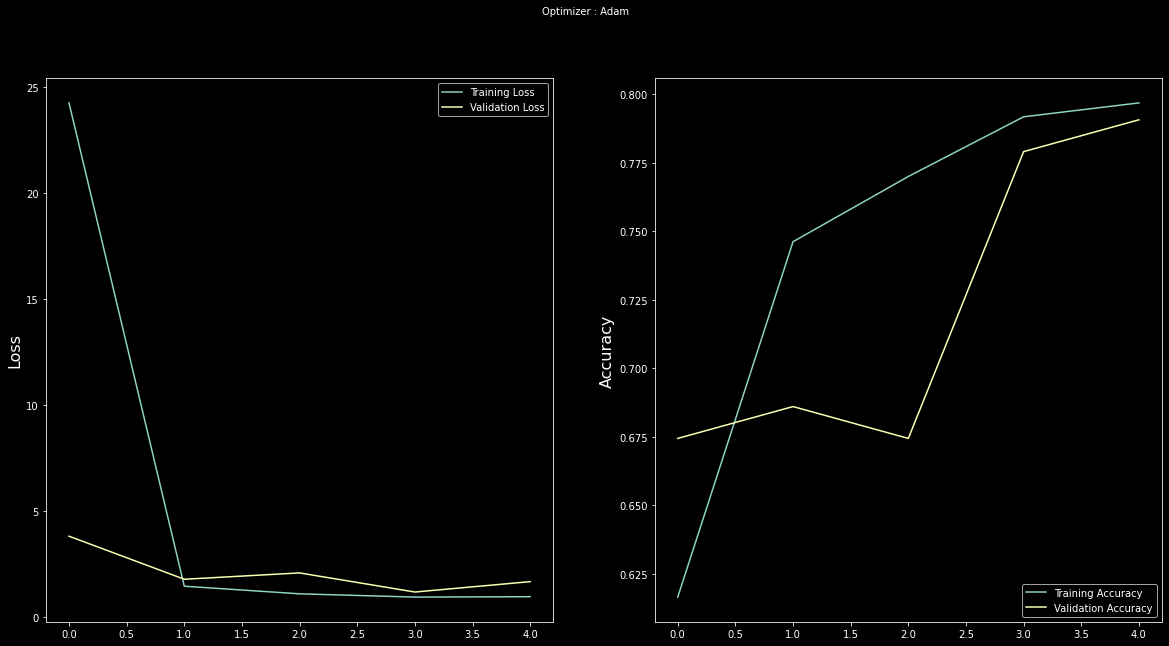

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# VGG

In [ ]:
vgg_model = Sequential()
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(4, activation='softmax'))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_7 (Flatten)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dense_15 (Dense)            (None, 4)                 2052      
                                                                 
Total params: 14,979,396
Trainable params: 264,708
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model_path="/home/VGG.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [ ]:
vgg_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs=5
history = vgg_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = callbacks_list
)

Epoch 1/5
62/62 [==============================] - ETA: 0s - loss: 1.0338 - accuracy: 0.8110 
Epoch 1: val_accuracy improved from -inf to 0.93023, saving model to /home/VGG.h5
62/62 [==============================] - 670s 11s/step - loss: 1.0338 - accuracy: 0.8110 - val_loss: 0.4061 - val_accuracy: 0.9302
Epoch 2/5
62/62 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9478 
Epoch 2: val_accuracy did not improve from 0.93023
62/62 [==============================] - 675s 11s/step - loss: 0.1622 - accuracy: 0.9478 - val_loss: 0.3417 - val_accuracy: 0.9302
Epoch 3/5
62/62 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9569 
Epoch 3: val_accuracy improved from 0.93023 to 0.97674, saving model to /home/VGG.h5
62/62 [==============================] - 675s 11s/step - loss: 0.1071 - accuracy: 0.9569 - val_loss: 0.2565 - val_accuracy: 0.9767
Epoch 4/5
62/62 [==============================] - ETA: 0s - loss: 0.0706 - accuracy: 0.9742 
Epoch 4: val_

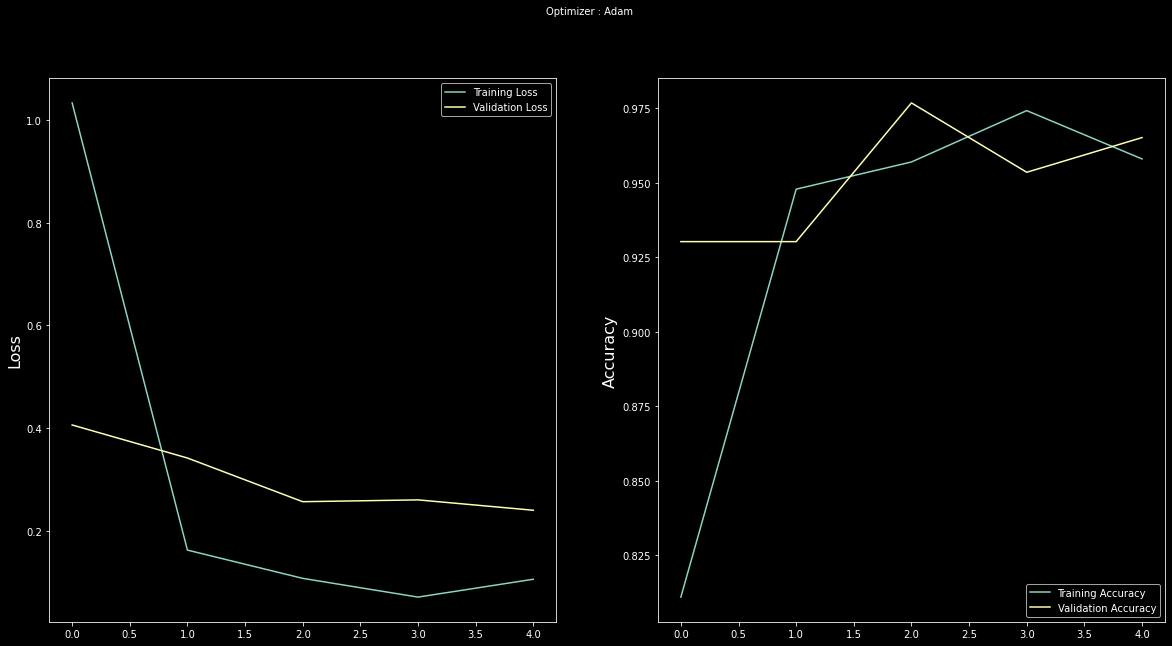

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


TypeError: ignored

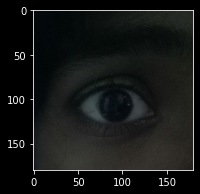

In [105]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
sns.heatmap(cf_matrix, annot=True)

# Test

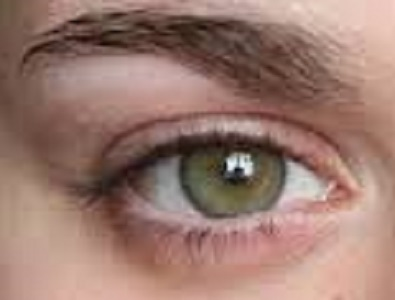

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image=cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/Math/dataset_new/test/Open/_107.jpg')
cv2_imshow(image)
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)


In [ ]:
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Open


In [ ]:
pred=xception_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Open


In [ ]:
pred=inception_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Open


In [114]:
pred=vgg_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Open
